<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Bert Sentiment Analysis
[Ejemplo similar en Pytorch](https://colab.research.google.com/drive/1PHv-IRLPCtv7oTcIGbsgZHqrB5LPvB7S#scrollTo=m_mRflxPl32F)

In [1]:
!pip install transformers --quiet

In [2]:
import tensorflow
from transformers import TFBertModel

# Definimos los modelos

## Modelo 1: 3 clases

In [3]:
# Importamos la primera parte: encoder
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [4]:
# Para modelos 1 y 2
max_length = 140
output_shape = 3

In [5]:
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model_1 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [ ]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                       

- La salida del modelo, de la softmax, son 3 (como las categorías) enmascaradas.

## Modelo 2: 3 clases + capa densa

In [6]:
# Usamos la misma parte de input y attention
x2 = tensorflow.keras.layers.Dropout(0.2)(pooled_output)

# Agrego una capa densa
dense2 = tensorflow.keras.layers.Dense(bert_model.config.hidden_size)(x2)

output2 = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(dense2)

model_2 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output2)

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [7]:
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                     

## Modelo 3: 5 clases

In [8]:
# Nuevo output_shape
output_shape = 6

In [9]:
# Usamos de base el modelo de las 5 clases
x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model_3 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

model_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                     

# Funciones y Datos

In [10]:
# Importamos Seaborn y Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

### Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [12]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0   156k      0 --:--:-- --:--:-- --:--:--  128M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0   274k      0  0:00:25  0:00:25 --:--:-- 1698k


In [13]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [14]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


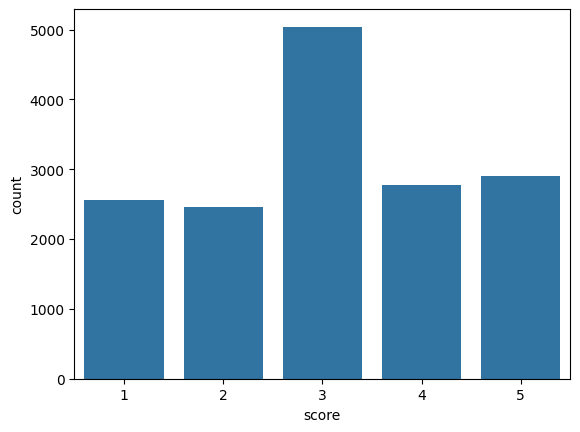

In [15]:
# ¿Cómo están balanceados los datos?
sns.countplot(x=df.score);

## Limpieza de datos: para 3 clases

In [16]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

<ipython-input-15-15c40b0fa175>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(class_names);


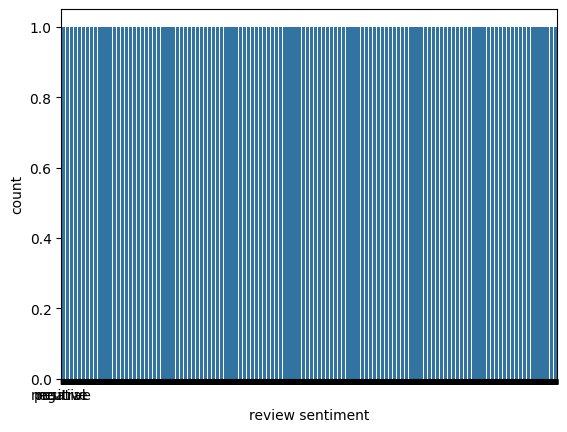

In [ ]:
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

In [17]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

In [18]:
# Importamos numpy
import numpy as np

Median: 139.0


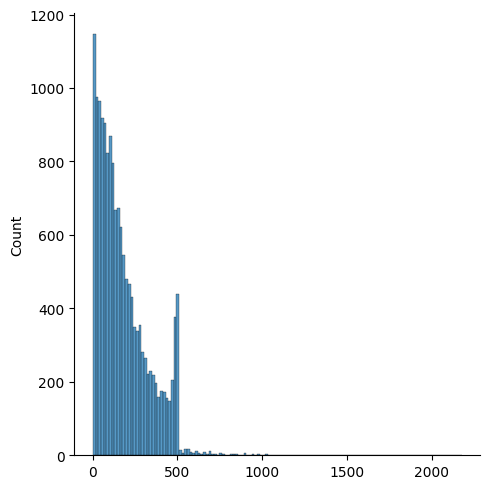

In [19]:
sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens);

In [20]:
# Importamos para categorizar
from tensorflow.keras.utils import to_categorical

In [21]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
output shape: 3


## Data generator


In [22]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer
import numpy as np

In [23]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [24]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [25]:
print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [26]:
# Esto se necesita ya que la librería de hugging face espera así los datos
def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]

    return train_InputExamples, validation_InputExamples


def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )

In [27]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [28]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [29]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [30]:
y_test = y[idx_test]

# BERT multiclass classification

In [ ]:
# Vemos el tamaño de la pooled_output_layer
bert_model.config.hidden_size

768

## Modelo 1: entrenamiento y F1-Score

- Probamos con 10 épocas, ya que en versiones anteriores el valor de score podría mejorar con más de 5 épocas.

In [31]:
history1 = model_1.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
315/315 [==============================] - 215s 463ms/step - loss: 1.1216 - accuracy: 0.3979 - f1_score: 0.3928 - val_loss: 1.0383 - val_accuracy: 0.5242 - val_f1_score: 0.4205
Epoch 2/10
315/315 [==============================] - 127s 404ms/step - loss: 1.0433 - accuracy: 0.4599 - f1_score: 0.4513 - val_loss: 0.9746 - val_accuracy: 0.4889 - val_f1_score: 0.4527
Epoch 3/10
315/315 [==============================] - 127s 402ms/step - loss: 0.9998 - accuracy: 0.4955 - f1_score: 0.4846 - val_loss: 0.9430 - val_accuracy: 0.5500 - val_f1_score: 0.4728
Epoch 4/10
315/315 [==============================] - 131s 418ms/step - loss: 0.9783 - accuracy: 0.5129 - f1_score: 0.5029 - val_loss: 0.9386 - val_accuracy: 0.5504 - val_f1_score: 0.4567
Epoch 5/10
315/315 [==============================] - 130s 411ms/step - loss: 0.9570 - accuracy: 0.5215 - f1_score: 0.5105 - val_loss: 0.9366 - val_accuracy: 0.5575 - val_f1_score: 0.4605
Epoch 6/10
315/315 [==============================] - 129s 4

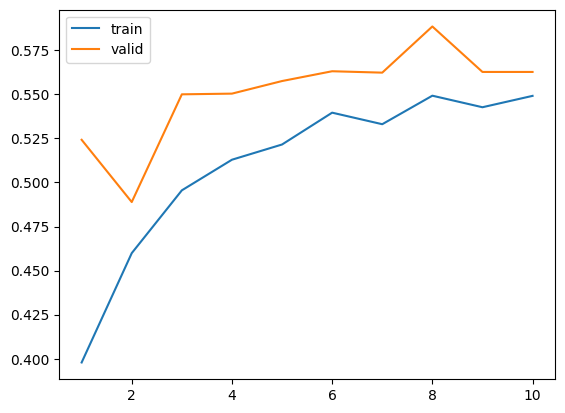

In [32]:
plot_train_metrics(history1)

In [33]:
y_hat_prob = model_1.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 39s 294ms/step


array([[0.4463279 , 0.35443905, 0.19923306],
       [0.38000047, 0.2660724 , 0.35392708],
       [0.17064804, 0.31644255, 0.5129094 ]], dtype=float32)

In [34]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [35]:
# Calcular el score
scores = model_1.evaluate(X_test, y_test)
print(f'F1-Score modelo 1: {scores[2]}')

99/99 [==============================] - 45s 294ms/step - loss: 0.8904 - accuracy: 0.5625 - f1_score: 0.5168
F1-Score modelo 1: 0.5167770981788635


## Modelo 2: entrenamiento y F1-Score

In [36]:
# Entrenamiento modelo 2
history2 = model_2.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
315/315 [==============================] - 162s 432ms/step - loss: 1.2890 - accuracy: 0.4459 - f1_score: 0.4406 - val_loss: 0.9744 - val_accuracy: 0.4917 - val_f1_score: 0.4418
Epoch 2/10
315/315 [==============================] - 127s 403ms/step - loss: 1.0122 - accuracy: 0.5005 - f1_score: 0.4918 - val_loss: 0.9893 - val_accuracy: 0.4643 - val_f1_score: 0.4070
Epoch 3/10
315/315 [==============================] - 128s 406ms/step - loss: 0.9744 - accuracy: 0.5082 - f1_score: 0.4963 - val_loss: 0.9127 - val_accuracy: 0.5456 - val_f1_score: 0.4879
Epoch 4/10
315/315 [==============================] - 128s 405ms/step - loss: 0.9644 - accuracy: 0.5234 - f1_score: 0.5111 - val_loss: 1.0271 - val_accuracy: 0.4770 - val_f1_score: 0.3726
Epoch 5/10
315/315 [==============================] - 127s 405ms/step - loss: 0.9629 - accuracy: 0.5237 - f1_score: 0.5103 - val_loss: 0.8823 - val_accuracy: 0.5651 - val_f1_score: 0.5335
Epoch 6/10
315/315 [==============================] - 128s 4

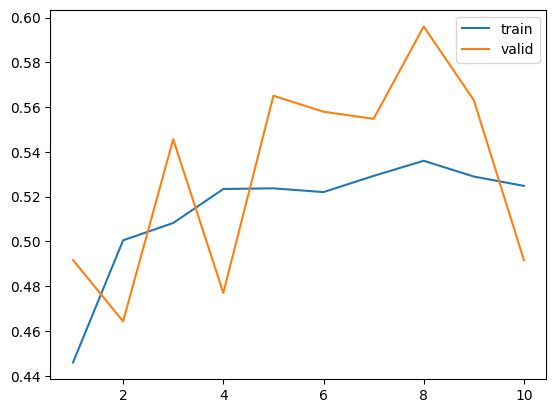

In [37]:
plot_train_metrics(history2)

In [38]:
y_hat_prob = model_2.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 39s 305ms/step


array([[0.38789168, 0.27594453, 0.3361638 ],
       [0.24808979, 0.23020656, 0.5217036 ],
       [0.14306003, 0.21268632, 0.6442537 ]], dtype=float32)

In [39]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [40]:
# Calcular el score
scores = model_2.evaluate(X_test, y_test)
print(f'F1-Score modelo 2: {scores[2]}')

99/99 [==============================] - 40s 304ms/step - loss: 0.9764 - accuracy: 0.4921 - f1_score: 0.4110
F1-Score modelo 2: 0.4110243022441864


- Con una capa densa más, no se vió una mejora del modelo 1.

## Modelo 3: entrenamiento y F1-Score

- Debemos realizar un ajuste del target para tener los 5 scores

### Ajuste de datos para 5 clases

In [41]:
# Tomamos el score del dataframe original y vemos el shape
y = df.score.values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
[[0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
output shape: 6


In [42]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)

train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [43]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [44]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [45]:
y_test = y[idx_test]

### Entrenamiento y score final

In [46]:
# Entrenamiento modelo 2
history3 = model_3.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
315/315 [==============================] - 169s 450ms/step - loss: 1.6083 - accuracy: 0.2889 - f1_score: 0.1802 - val_loss: 1.5006 - val_accuracy: 0.3722 - val_f1_score: 0.2469
Epoch 2/10
315/315 [==============================] - 126s 400ms/step - loss: 1.5206 - accuracy: 0.3295 - f1_score: 0.2167 - val_loss: 1.4484 - val_accuracy: 0.3980 - val_f1_score: 0.3101
Epoch 3/10
315/315 [==============================] - 128s 406ms/step - loss: 1.4724 - accuracy: 0.3641 - f1_score: 0.2468 - val_loss: 1.4191 - val_accuracy: 0.3810 - val_f1_score: 0.2364
Epoch 4/10
315/315 [==============================] - 128s 405ms/step - loss: 1.4572 - accuracy: 0.3706 - f1_score: 0.2514 - val_loss: 1.3803 - val_accuracy: 0.4341 - val_f1_score: 0.3012
Epoch 5/10
315/315 [==============================] - 128s 405ms/step - loss: 1.4296 - accuracy: 0.3799 - f1_score: 0.2603 - val_loss: 1.3732 - val_accuracy: 0.4198 - val_f1_score: 0.2961
Epoch 6/10
315/315 [==============================] - 128s 4

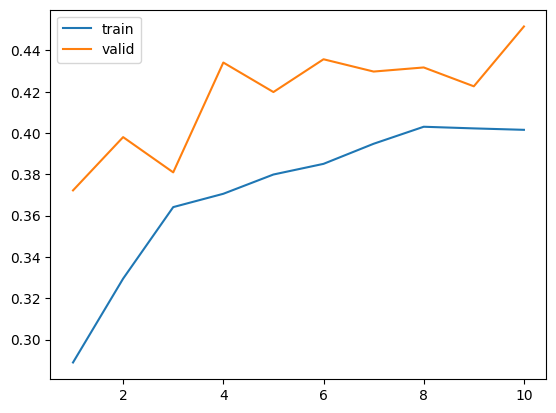

In [47]:
plot_train_metrics(history3)

In [48]:
y_hat_prob = model_3.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 39s 296ms/step


array([[2.30839623e-06, 3.15755934e-01, 2.74856001e-01, 2.66390830e-01,
        7.96474442e-02, 6.33475110e-02],
       [4.10978919e-06, 2.34763220e-01, 2.94696182e-01, 2.19827309e-01,
        1.15184478e-01, 1.35524660e-01],
       [3.23804989e-06, 1.02066904e-01, 2.18651637e-01, 3.27537745e-01,
        1.89230978e-01, 1.62509456e-01]], dtype=float32)

In [49]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [50]:
# Calcular el score
scores = model_3.evaluate(X_test, y_test)
print(f'F1-Score modelo 3: {scores[2]}')

99/99 [==============================] - 45s 303ms/step - loss: 1.3329 - accuracy: 0.4244 - f1_score: 0.3060
F1-Score modelo 3: 0.30595195293426514


# Conclusiones

- Se corre un modelo 1 con F1-Score de 0.5168.
- Se corre un modelo 2 con F1-Score de 0.4110. En este caso, una capa densa mas antes de la capa de clasificación no mejora el score final.
- Se corre un modelo 3 con F1-Score 0.3060. Mucho más bajo. Probablemente porque existe un desbalance en las clases originales como se vio en las gráficas de la sección "Funciones y Datos".
- Esto puede ser debido a que el modelo pueda sesgarse hacia la clase mayoritaria, a la penalización de los errores en la clase minoritaria de manera más severa o a la dificultd con el aprendizaje de las características de la clase minoritaria.